In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
import numpy as np

def prepare_data():
    (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
    x_train_cifar = x_train_cifar.astype("float32") / 255.0
    x_test_cifar = x_test_cifar.astype("float32") / 255.0
    y_train_cifar = to_categorical(y_train_cifar.flatten(), 10)
    y_test_cifar = to_categorical(y_test_cifar.flatten(), 10)

    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
    x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_train_mnist = np.repeat(x_train_mnist, 3, axis=-1)
    x_test_mnist = np.repeat(x_test_mnist, 3, axis=-1)
    x_train_mnist = tf.image.resize(x_train_mnist, (32, 32)).numpy()
    x_test_mnist = tf.image.resize(x_test_mnist, (32, 32)).numpy()

    y_train_mnist = to_categorical(y_train_mnist, 10)
    y_test_mnist = to_categorical(y_test_mnist, 10)

    y_train_mnist = np.concatenate([np.zeros((y_train_mnist.shape[0], 10)), y_train_mnist], axis=1)
    y_test_mnist = np.concatenate([np.zeros((y_test_mnist.shape[0], 10)), y_test_mnist], axis=1)

    y_train_cifar = np.concatenate([y_train_cifar, np.zeros((y_train_cifar.shape[0], 10))], axis=1)
    y_test_cifar = np.concatenate([y_test_cifar, np.zeros((y_test_cifar.shape[0], 10))], axis=1)

    x_train = np.concatenate([x_train_cifar, x_train_mnist], axis=0)
    y_train = np.concatenate([y_train_cifar, y_train_mnist], axis=0)

    x_test = np.concatenate([x_test_cifar, x_test_mnist], axis=0)
    y_test = np.concatenate([y_test_cifar, y_test_mnist], axis=0)

    return (x_train, y_train), (x_test, y_test)

def create_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.25)(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Dropout(0.5)(x)

    output = Dense(20, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

(x_train, y_train), (x_test, y_test) = prepare_data()

model = create_model((32, 32, 3))
model.summary()

model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

results = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {results[1]:.4f}")


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,828 (2.38 MB)

 Trainable params: 623,380 (2.38 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.2626 - loss: 3.1074 - val_accuracy: 0.9364 - val_loss: 0.6334
Epoch 2/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5634 - loss: 1.6646 - val_accuracy: 0.9626 - val_loss: 0.5054
Epoch 3/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6408 - loss: 1.3949 - val_accuracy: 0.9702 - val_loss: 0.4308
Epoch 4/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6767 - loss: 1.2404 - val_accuracy: 0.9768 - val_loss: 0.3709
Epoch 5/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7050 - loss: 1.1273 - val_accuracy: 0.9800 - val_loss: 0.3231
Epoch 6/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7254 - loss: 1.0295 - val_accuracy: 0.9818 - val_loss: 0.2856
Epoch 7/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7437 - loss: 0.9556 - val_accuracy: 0.9830 - val_loss: 0.2578
Epoch 8/25
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7521 - loss: 0.898

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
\nTraining model with parameters set 1: {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25}
Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.3087 - loss: 2.8527 - val_accuracy: 0.9517 - val_loss: 0.5830
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6006 - loss: 1.5464 - val_accuracy: 0.9661 - val_loss: 0.4874
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6567 - loss: 1.3338 - val_accuracy: 0.9738 - val_loss: 0.4135
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6880 - loss: 1.2027 - val_accuracy: 0.9773 - val_loss: 0.3576
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7119 - loss: 1.0928 - val_accuracy: 0.9817 - val_loss: 0.3104
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7343 - loss: 0.9979 - val_accuracy: 0.9820 - val_loss: 0.2768
Epoch 7

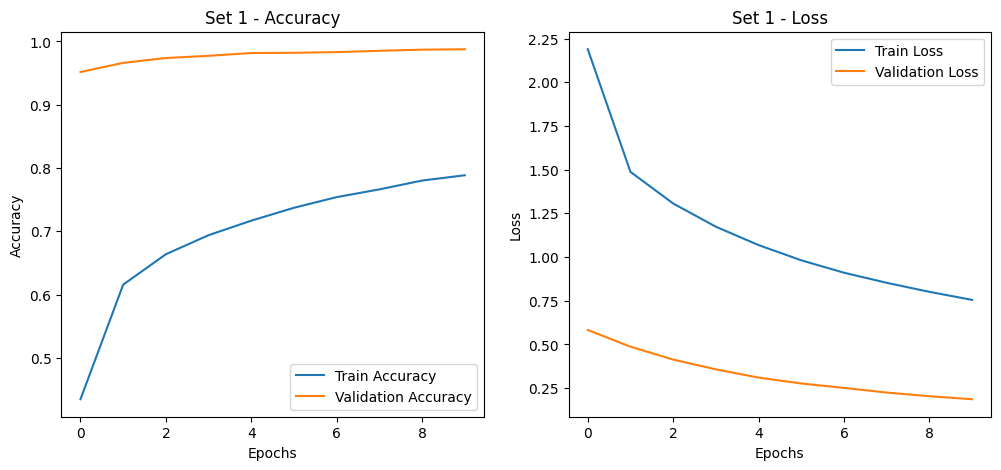

\nTraining model with parameters set 2: {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3}
Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.3822 - loss: 3.0803 - val_accuracy: 0.9571 - val_loss: 0.9610
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6432 - loss: 1.8087 - val_accuracy: 0.9740 - val_loss: 0.7880
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6991 - loss: 1.5230 - val_accuracy: 0.9796 - val_loss: 0.6438
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7322 - loss: 1.3074 - val_accuracy: 0.9838 - val_loss: 0.5250
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7639 - loss: 1.1223 - val_accuracy: 0.9846 - val_loss: 0.4451
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7849 - loss: 0.9900 - val_accuracy: 0.9860 - val_loss: 0.3852
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8060 - loss: 0.8847 - val_accuracy: 0.9828

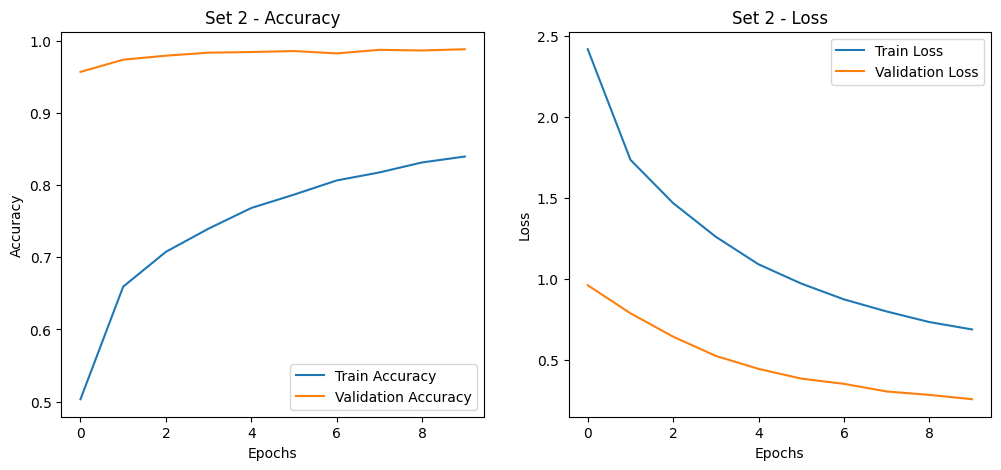

\nTraining model with parameters set 3: {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}
Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.3713 - loss: 4.1595 - val_accuracy: 0.9625 - val_loss: 1.7373
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.6442 - loss: 2.5374 - val_accuracy: 0.9749 - val_loss: 1.3528
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.6966 - loss: 2.0395 - val_accuracy: 0.9806 - val_loss: 1.0054
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.7406 - loss: 1.6149 - val_accuracy: 0.9830 - val_loss: 0.7594
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.7678 - loss: 1.3214 - val_accuracy: 0.9833 - val_loss: 0.6207
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7932 - loss: 1.1359 - val_accuracy: 0.9870 - val_loss: 0.5325
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.8143 - loss: 1.0097 - val_accuracy

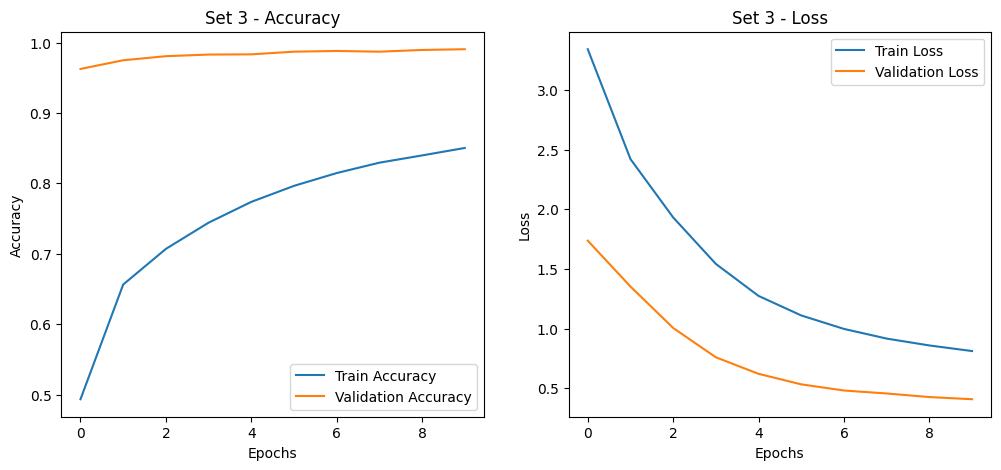

\nFinal Results:
Set 1: {'params': {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25}, 'accuracy': 0.837149977684021, 'loss': 0.6050946116447449}
Set 2: {'params': {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3}, 'accuracy': 0.8704500198364258, 'loss': 0.5878570675849915}
Set 3: {'params': {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}, 'accuracy': 0.8674499988555908, 'loss': 0.7572593092918396}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
import numpy as np
import matplotlib.pyplot as plt

def prepare_data():
    (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
    x_train_cifar = x_train_cifar.astype("float32") / 255.0
    x_test_cifar = x_test_cifar.astype("float32") / 255.0
    y_train_cifar = to_categorical(y_train_cifar.flatten(), 10)
    y_test_cifar = to_categorical(y_test_cifar.flatten(), 10)

    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
    x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_train_mnist = np.repeat(x_train_mnist, 3, axis=-1)
    x_test_mnist = np.repeat(x_test_mnist, 3, axis=-1)
    x_train_mnist = tf.image.resize(x_train_mnist, (32, 32)).numpy()
    x_test_mnist = tf.image.resize(x_test_mnist, (32, 32)).numpy()

    y_train_mnist = to_categorical(y_train_mnist, 10)
    y_test_mnist = to_categorical(y_test_mnist, 10)

    y_train_mnist = np.concatenate([np.zeros((y_train_mnist.shape[0], 10)), y_train_mnist], axis=1)
    y_test_mnist = np.concatenate([np.zeros((y_test_mnist.shape[0], 10)), y_test_mnist], axis=1)

    y_train_cifar = np.concatenate([y_train_cifar, np.zeros((y_train_cifar.shape[0], 10))], axis=1)
    y_test_cifar = np.concatenate([y_test_cifar, np.zeros((y_test_cifar.shape[0], 10))], axis=1)

    x_train = np.concatenate([x_train_cifar, x_train_mnist], axis=0)
    y_train = np.concatenate([y_train_cifar, y_train_mnist], axis=0)

    x_test = np.concatenate([x_test_cifar, x_test_mnist], axis=0)
    y_test = np.concatenate([y_test_cifar, y_test_mnist], axis=0)

    return (x_train, y_train), (x_test, y_test)

def create_model(input_shape, conv_filters, dense_units, dropout_rate):
    inputs = Input(shape=input_shape)
    x = Conv2D(conv_filters, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)

    x = Conv2D(conv_filters * 2, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)

    x = Conv2D(conv_filters * 4, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate + 0.1)(x)

    x = Flatten()(x)
    x = Dense(dense_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Dropout(dropout_rate + 0.2)(x)

    output = Dense(20, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_training(history, param_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{param_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{param_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

(x_train, y_train), (x_test, y_test) = prepare_data()

param_sets = [
    {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25},
    {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3},
    {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}
]

results = []
for i, params in enumerate(param_sets):
    print(f"\\nTraining model with parameters set {i+1}: {params}")
    model = create_model((32, 32, 3), **params)
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

    test_results = model.evaluate(x_test, y_test, verbose=0)
    results.append({'params': params, 'accuracy': test_results[1], 'loss': test_results[0]})

    print(f"Set {i+1} Test Accuracy: {test_results[1]:.4f}")
    print(f"Set {i+1} Test Loss: {test_results[0]:.4f}")

    plot_training(history, f"Set {i+1}")

print("\\nFinal Results:")
for i, res in enumerate(results):
    print(f"Set {i+1}: {res}")



Training models with parameters set 1: {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25}
Training on CIFAR-10...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.1951 - loss: 3.1412 - val_accuracy: 0.2813 - val_loss: 2.9687
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3366 - loss: 2.2570 - val_accuracy: 0.4165 - val_loss: 2.2171
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4026 - loss: 2.0663 - val_accuracy: 0.4374 - val_loss: 2.2916
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4408 - loss: 1.9334 - val_accuracy: 0.4649 - val_loss: 2.1367
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4673 - loss: 1.8401 - val_accuracy: 0.5046 - val_loss: 1.8606
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4957 - loss: 1.7346 - val_accuracy: 0.5289 - val_loss: 1.7868
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5238 - loss: 1.6436 - val_accuracy: 0.

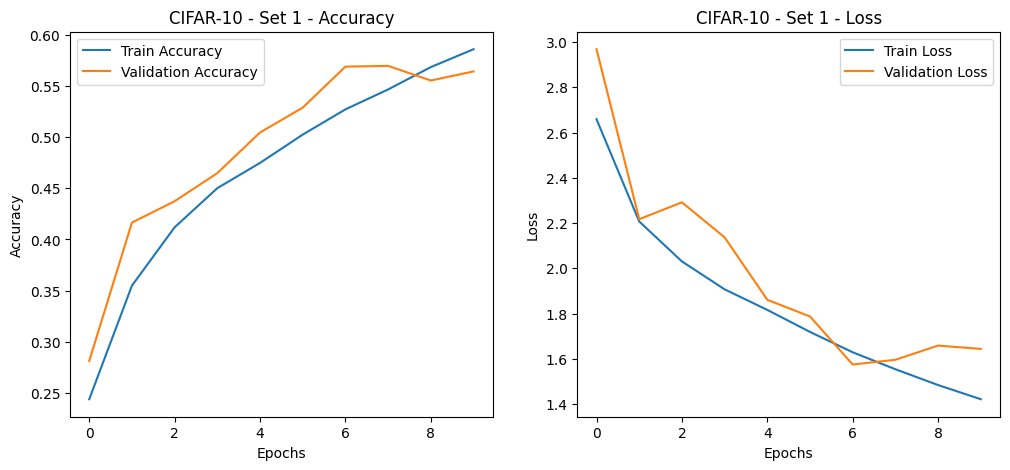

Training on MNIST...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5250 - loss: 2.1636 - val_accuracy: 0.9437 - val_loss: 0.6194
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8942 - loss: 0.7547 - val_accuracy: 0.9699 - val_loss: 0.5066
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9341 - loss: 0.6093 - val_accuracy: 0.9770 - val_loss: 0.4532
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9509 - loss: 0.5281 - val_accuracy: 0.9810 - val_loss: 0.4007
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9595 - loss: 0.4606 - val_accuracy: 0.9835 - val_loss: 0.3589
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9661 - loss: 0.4020 - val_accuracy: 0.9851 - val_loss: 0.3194
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9718 - loss: 0.3512 - val_accuracy: 0.9876 - val_loss: 0.2817
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9750 - loss: 0.3

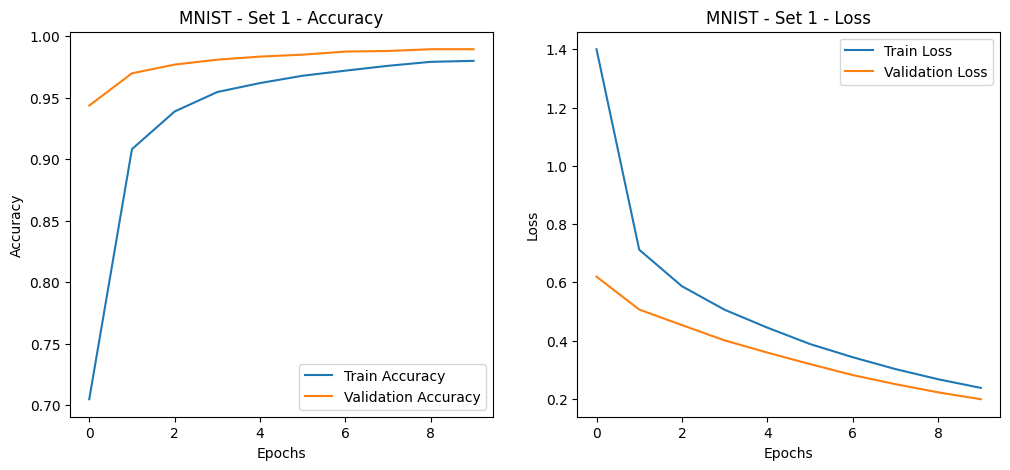


Training models with parameters set 2: {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3}
Training on CIFAR-10...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2329 - loss: 3.6034 - val_accuracy: 0.3286 - val_loss: 3.6737
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3911 - loss: 2.5562 - val_accuracy: 0.4754 - val_loss: 2.6441
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4463 - loss: 2.3330 - val_accuracy: 0.5105 - val_loss: 2.4294
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4873 - loss: 2.1739 - val_accuracy: 0.5302 - val_loss: 2.3830
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5296 - loss: 2.0129 - val_accuracy: 0.5751 - val_loss: 2.0225
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5465 - loss: 1.8857 - val_accuracy: 0.6080 - val_loss: 1.8039
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5772 - loss: 1.7412 - val_accuracy:

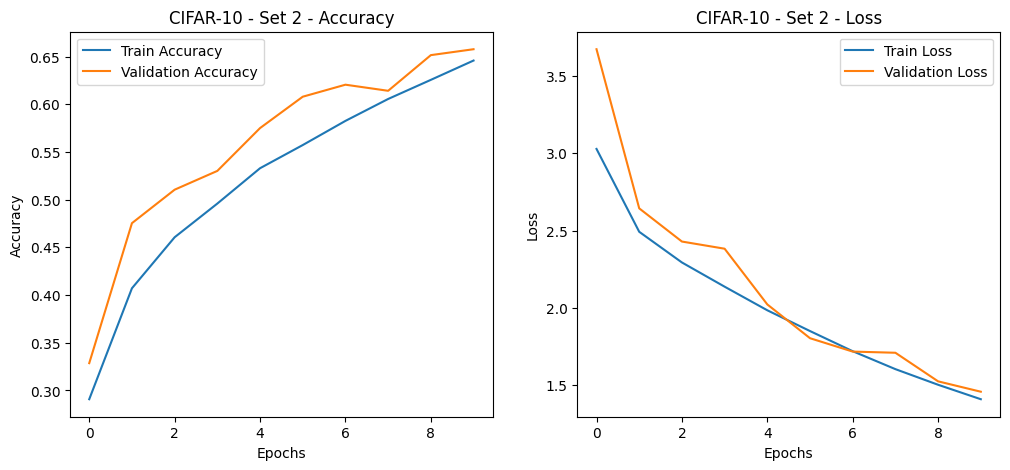

Training on MNIST...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6185 - loss: 2.3311 - val_accuracy: 0.9558 - val_loss: 0.9876
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9296 - loss: 1.0687 - val_accuracy: 0.9772 - val_loss: 0.8433
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9555 - loss: 0.8860 - val_accuracy: 0.9815 - val_loss: 0.7330
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9665 - loss: 0.7499 - val_accuracy: 0.9850 - val_loss: 0.6258
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9731 - loss: 0.6374 - val_accuracy: 0.9877 - val_loss: 0.5223
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9795 - loss: 0.5275 - val_accuracy: 0.9867 - val_loss: 0.4450
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9803 - loss: 0.4443 - val_accuracy: 0.9896 - val_loss: 0.3696
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9826 - lo

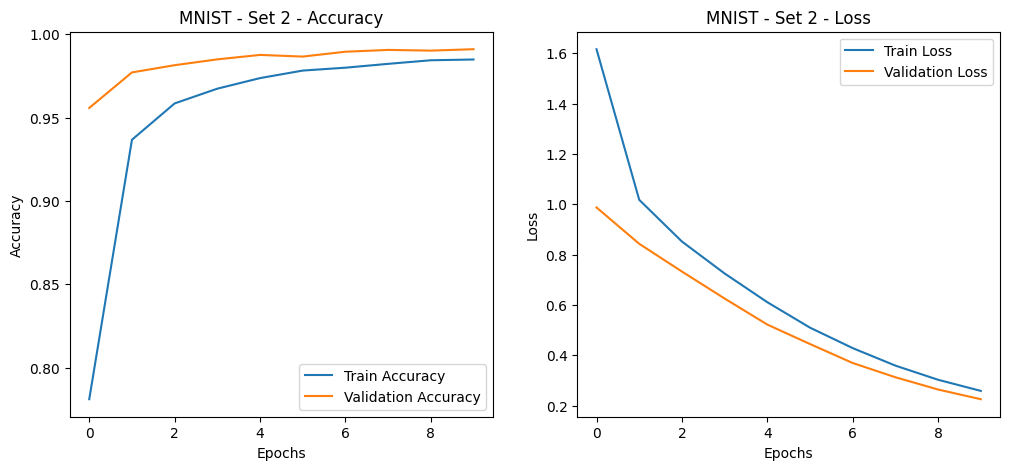


Training models with parameters set 3: {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}
Training on CIFAR-10...
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.2282 - loss: 4.7575 - val_accuracy: 0.3123 - val_loss: 5.5149
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.3748 - loss: 3.4393 - val_accuracy: 0.4326 - val_loss: 4.1476
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4480 - loss: 3.1072 - val_accuracy: 0.4634 - val_loss: 3.8940
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.4823 - loss: 2.8447 - val_accuracy: 0.4654 - val_loss: 3.7691
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5257 - loss: 2.5668 - val_accuracy: 0.5001 - val_loss: 3.2479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5566 - loss: 2.3062 - val_accuracy: 0.6044 - val_loss: 2.1953
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5825 - loss: 2.0617 - va

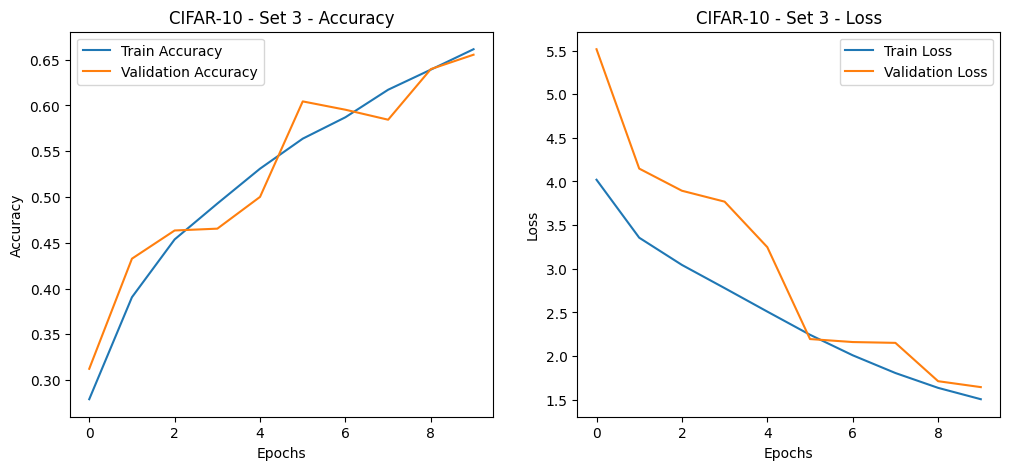

Training on MNIST...
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 21ms/step - accuracy: 0.6279 - loss: 3.3956 - val_accuracy: 0.9528 - val_loss: 1.8275
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9269 - loss: 1.8645 - val_accuracy: 0.9768 - val_loss: 1.5327
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9565 - loss: 1.5396 - val_accuracy: 0.9822 - val_loss: 1.2662
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9637 - loss: 1.2665 - val_accuracy: 0.9862 - val_loss: 1.0232
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.9717 - loss: 1.0088 - val_accuracy: 0.9871 - val_loss: 0.8114
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9755 - loss: 0.8001 - val_accuracy: 0.9877 - val_loss: 0.6428
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9779 - loss: 0.6318 - val_accuracy: 0.9898 - val_loss: 0.5063
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9

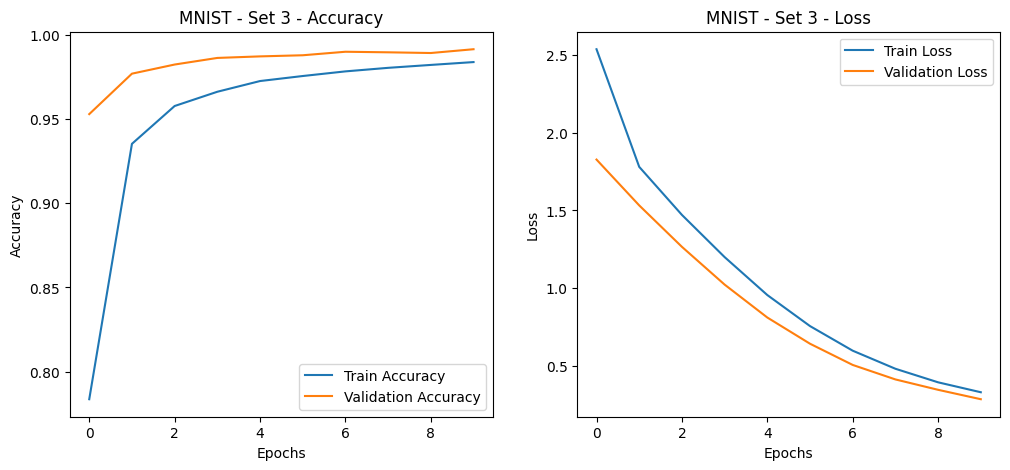


Final Results:

Results for CIFAR-10:
Set 1: {'params': {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25}, 'accuracy': 0.5654000043869019, 'loss': 1.650972843170166}
Set 2: {'params': {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3}, 'accuracy': 0.6531999707221985, 'loss': 1.4635103940963745}
Set 3: {'params': {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}, 'accuracy': 0.6510999798774719, 'loss': 1.6656824350357056}

Results for MNIST:
Set 1: {'params': {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25}, 'accuracy': 0.9908999800682068, 'loss': 0.18918883800506592}
Set 2: {'params': {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3}, 'accuracy': 0.9919000267982483, 'loss': 0.21770069003105164}
Set 3: {'params': {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}, 'accuracy': 0.9916999936103821, 'loss': 0.2792152762413025}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10, mnist
import numpy as np
import matplotlib.pyplot as plt

def prepare_data():
    (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()
    x_train_cifar = x_train_cifar.astype("float32") / 255.0
    x_test_cifar = x_test_cifar.astype("float32") / 255.0
    y_train_cifar = to_categorical(y_train_cifar.flatten(), 10)
    y_test_cifar = to_categorical(y_test_cifar.flatten(), 10)

    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
    x_train_mnist = x_train_mnist.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test_mnist = x_test_mnist.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_train_mnist = np.repeat(x_train_mnist, 3, axis=-1)
    x_test_mnist = np.repeat(x_test_mnist, 3, axis=-1)
    x_train_mnist = tf.image.resize(x_train_mnist, (32, 32)).numpy()
    x_test_mnist = tf.image.resize(x_test_mnist, (32, 32)).numpy()

    y_train_mnist = to_categorical(y_train_mnist, 10)
    y_test_mnist = to_categorical(y_test_mnist, 10)

    return (x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar), \
           (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist)

def create_model(input_shape, conv_filters, dense_units, dropout_rate):
    inputs = Input(shape=input_shape)
    x = Conv2D(conv_filters, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)

    x = Conv2D(conv_filters * 2, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate)(x)

    x = Conv2D(conv_filters * 4, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout_rate + 0.1)(x)

    x = Flatten()(x)
    x = Dense(dense_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
    x = Dropout(dropout_rate + 0.2)(x)

    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def plot_training(history, dataset_name, param_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{dataset_name} - {param_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{dataset_name} - {param_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar), \
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = prepare_data()

param_sets = [
    {'conv_filters': 32, 'dense_units': 256, 'dropout_rate': 0.25},
    {'conv_filters': 64, 'dense_units': 512, 'dropout_rate': 0.3},
    {'conv_filters': 128, 'dense_units': 1024, 'dropout_rate': 0.4}
]

results = {'CIFAR-10': [], 'MNIST': []}
for i, params in enumerate(param_sets):
    print(f"\nTraining models with parameters set {i+1}: {params}")

    # CIFAR-10
    print("Training on CIFAR-10...")
    model_cifar = create_model((32, 32, 3), **params)
    history_cifar = model_cifar.fit(x_train_cifar, y_train_cifar, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
    test_results_cifar = model_cifar.evaluate(x_test_cifar, y_test_cifar, verbose=0)
    results['CIFAR-10'].append({'params': params, 'accuracy': test_results_cifar[1], 'loss': test_results_cifar[0]})
    plot_training(history_cifar, "CIFAR-10", f"Set {i+1}")

    # MNIST
    print("Training on MNIST...")
    model_mnist = create_model((32, 32, 3), **params)
    history_mnist = model_mnist.fit(x_train_mnist, y_train_mnist, epochs=10, batch_size=64, validation_split=0.2, verbose=1)
    test_results_mnist = model_mnist.evaluate(x_test_mnist, y_test_mnist, verbose=0)
    results['MNIST'].append({'params': params, 'accuracy': test_results_mnist[1], 'loss': test_results_mnist[0]})
    plot_training(history_mnist, "MNIST", f"Set {i+1}")

print("\nFinal Results:")
for dataset, dataset_results in results.items():
    print(f"\nResults for {dataset}:")
    for i, res in enumerate(dataset_results):
        print(f"Set {i+1}: {res}")
